In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')

In [ ]:
#The shapes of Train and test datas
print(train.shape)
print(test.shape)

In [ ]:
#Filling in train data with real value
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture


train.runtime[train.id == 391] = 86 #Il peor natagle de la meva vida
train.runtime[train.id == 592] = 90 #А поутру они проснулись
train.runtime[train.id == 925] = 95 #¿Quién mató a Bambi?
train.runtime[train.id == 978] = 93 #La peggior settimana della mia vita
train.runtime[train.id == 1256] = 92 #Cipolla Colt
train.runtime[train.id == 1542] = 93 #Все и сразу
train.runtime[train.id == 1875] = 86 #Vermist
train.runtime[train.id == 2151] = 108 #Mechenosets
train.runtime[train.id == 2499] = 108 #Na Igre 2. Novyy Uroven
train.runtime[train.id == 2646] = 98 #同桌的妳
train.runtime[train.id == 2786] = 111 #Revelation
train.runtime[train.id == 2866] = 96 #Tutto tutto niente niente

# TEST
test.runtime[test.id == 4074] = 103 #Shikshanachya Aaicha Gho
test.runtime[test.id == 4222] = 93 #Street Knight
test.runtime[test.id == 4431] = 100 #Плюс один
test.runtime[test.id == 5520] = 86 #Glukhar v kino
test.runtime[test.id == 5845] = 83 #Frau Müller muss weg!
test.runtime[test.id == 5849] = 140 #Shabd
test.runtime[test.id == 6210] = 104 #Le dernier souffle
test.runtime[test.id == 6804] = 145 #Chaahat Ek Nasha..
test.runtime[test.id == 7321] = 87 #El truco del manco

In [ ]:
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['release_date'].isnull() == True, 'release_date'] = '10/19/2001'

In [ ]:
budget_median=train[train['budget']>0]['budget'].median()
print(budget_median)
revenue_median=train[train['revenue']>0]['revenue'].median()
runtime_median_train = train[train['runtime']>0]['runtime'].median()
runtime_median_test = test[test['runtime']>0]['runtime'].median()
print(revenue_median)

In [ ]:
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]

In [ ]:
invalid_revenue = train.id[train.budget > 1000][train.revenue < 100]
for anId in invalid_revenue :
    train.loc[train['id'] == anId,'revenue'] =  revenue_median
    
train['runtime'] = train['runtime'].fillna(runtime_median_train)
    
test['runtime'] = test['runtime'].fillna(runtime_median_test)

In [ ]:
train['budget_was_imputed'] = train['budget'].isnull()
test['budget_was_imputed'] = test['budget'].isnull()

invalid_budget_train = train.id[train.budget == 0]
for anId in invalid_budget_train:
    train.loc[train['id'] == anId,'budget'] =  budget_median
    train.loc[train['id'] == anId,'budget_was_imputed'] =  True
    
invalid_budget_test = test.id[test.budget == 0]
for anId in invalid_budget_test:
    test.loc[test['id'] == anId,'budget'] =  budget_median
    test.loc[test['id'] == anId,'budget_was_imputed'] =  True

In [ ]:
train.head()

In [ ]:
new_train=train.drop(['imdb_id','id', 'overview','poster_path','original_title', 'spoken_languages', 'status','tagline','title'], axis=1)
new_test=test.drop(['imdb_id','id', 'overview','poster_path','original_title', 'spoken_languages', 'status','tagline','title'], axis=1)
new_train['homepage'] = train['homepage'].notna()
new_test['homepage'] = test['homepage'].notna()

In [ ]:
import seaborn as sns
sns.jointplot(x="budget", y="revenue", data=new_train, hue = "popularity")

There seems to be a strong correlation between budget and total revenue grossed by the movie. Popularity seems to be quite irrelevant in determining neither the budget nor the revenue.

In [ ]:
sns.jointplot(x="budget", y="revenue", data=new_train, kind = "reg")

Budget and revenue show strong linear correlation. Due to the fact we imputed median values for those that were NaN in budget, the graph for budget distribution has a considerable spike in the quantity of median values.
Revenue quantities are evidently heavily skewed to the right e.g. a lot of movies make under 20 million dollars.

In [ ]:
sns.jointplot(x="popularity", y="revenue", data=new_train, kind="reg")

As we saw from the first graph, there seems to be no correlation between popularity and revenue. Popularity graph is a lot less skewed to the right than the revenue graph. Popularity is a lot more evenly distributed, with a few movies being outliers wiht incredible popularity.

In [ ]:
sns.jointplot(x="runtime", y="revenue", data=new_train, kind="reg")

Runtime seems to have little effect on the budget. Runtime is normally distributed around 70-200 minutes.

In [ ]:
sns.distplot(train.revenue)

In [ ]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'])

In [ ]:
#JSON Parsing, some stuff borrowed :-)
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [ ]:
from sklearn.preprocessing import LabelEncoder
total_data=pd.concat([new_train, new_test])
encoder=LabelEncoder()
encoder.fit(total_data['original_language'])
new_train['original_language']=encoder.transform(new_train['original_language'])
new_test['original_language']=encoder.transform(new_test['original_language'])

new_train['collection'] = new_train['belongs_to_collection'].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
new_test['collection'] = new_test['belongs_to_collection'].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
encoder2 = LabelEncoder()
total_data=pd.concat([new_train, new_test])
encoder2.fit(total_data['collection'])
new_train['collection'] = encoder2.transform(new_train['collection'])
new_test['collection'] = encoder2.transform(new_test['collection']) 

new_train['genre_encoded'] = new_train['genres'].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
new_test['genre_encoded'] = new_test['genres'].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
encoder3 = LabelEncoder()
total_data=pd.concat([new_train, new_test])
encoder3.fit(total_data['genre_encoded'])
new_train['genre_encoded'] = encoder3.transform(new_train['genre_encoded'])
new_test['genre_encoded'] = encoder3.transform(new_test['genre_encoded']) 


In [ ]:
from datetime import timedelta, date
new_train['release_date'] = pd.to_datetime(new_train['release_date'])
new_train['year']=new_train['release_date'].dt.year
new_train['day_of_year']=new_train['release_date'].dt.dayofyear
new_train['day_of_week']=new_train['release_date'].dt.dayofweek
new_train['quarter']=new_train['release_date'].dt.quarter
new_train['month']=new_train['release_date'].dt.month
new_train.drop(['release_date', 'belongs_to_collection', 'genres', 'crew', 'cast'], axis=1, inplace=True)

new_target = new_train.pop('revenue')

In [ ]:
new_test['release_date'] = pd.to_datetime(new_test['release_date'])
new_test['year']=new_test['release_date'].dt.year
new_test['day_of_year']=new_test['release_date'].dt.dayofyear
new_test['day_of_week']=new_test['release_date'].dt.dayofweek
new_test['quarter']=new_test['release_date'].dt.quarter
new_test['month']=new_test['release_date'].dt.month
new_test.drop(['release_date', 'belongs_to_collection', 'genres', 'crew', 'cast'], axis=1, inplace=True)


In [ ]:
new_test.head()


In [ ]:
new_test.head()

In [ ]:
for column in ['production_countries','production_companies', 'Keywords']:
    new_train[f"{column}_encoded"] = new_train[column].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
    new_test[f"{column}_encoded"] = new_test[column].apply(lambda x: get_dictionary(x)).apply(lambda row: row[0]['name'] if row != {} else '0')
    encoder3 = LabelEncoder()
    total_data=pd.concat([new_train, new_test])
    encoder3.fit(total_data[f"{column}_encoded"])
    new_train[f"{column}_encoded"] = encoder3.transform(new_train[f"{column}_encoded"])
    new_test[f"{column}_encoded"] = encoder3.transform(new_test[f"{column}_encoded"]) 
    new_test.drop([column], axis=1, inplace=True)
    new_train.drop([column], axis=1, inplace=True)

In [ ]:
 new_test.head()

In [ ]:
new_train.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(new_train, new_target, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
#From Kaggle Course

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [ ]:
print(score_dataset(X_train, X_valid, y_train, y_valid))

In [ ]:
#
discrete_features = new_test.dtypes != float
discrete_features= ['homepage', 'original_language', 'budget_was_imputed', 'collection', 'genre_encoded', 'year', 'day_of_year',
                   'day_of_week', 'Keywords_encoded',  'production_companies_encoded', 'production_countries_encoded', 'month', 'quarter']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Utility mi_score and plot mi scores functions from Kaggle Feature Engineering course
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(new_train, new_target)
mi_scores[:]

In [ ]:
#from Kaggle course on Feature Engineering
def plot_mi_scores(scores):
    import seaborn as sns
    from sklearn.feature_selection import mutual_info_regression
    import matplotlib.pyplot as plt
    plt.style.use("seaborn-whitegrid")
    plt.rc("figure", autolayout=True)
    plt.rc(
        "axes",
        labelweight="bold",
        labelsize="large",
        titleweight="bold",
        titlesize=14,
        titlepad=10,
    )
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plot_mi_scores(mi_scores)

In [ ]:
#quarter and month seem to be irrelevant, so lets drop them
new_test.drop(['quarter', 'month'], axis=1, inplace=True)
new_train.drop(['quarter', 'month'], axis=1, inplace=True)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(new_train, new_target, train_size=0.8, test_size=0.2, random_state=0)
print(score_dataset(X_train, X_valid, y_train, y_valid))

Our previous score was 41388287.35, so dropping them resulted in an improvement

In [ ]:
print(new_train.shape,
new_test.shape,
new_target.shape)

BASELINE METHOD - using median revenue value

In [ ]:
test_rows = new_test.shape[0]
movie_id = [3001 + x for x in range(0,test_rows )] #to account for time steps
baseline1_predictions = [revenue_median] * test_rows

output = pd.DataFrame({'id': movie_id,
                       'revenue': baseline1_predictions})
output.to_csv('submission.csv', index=False)

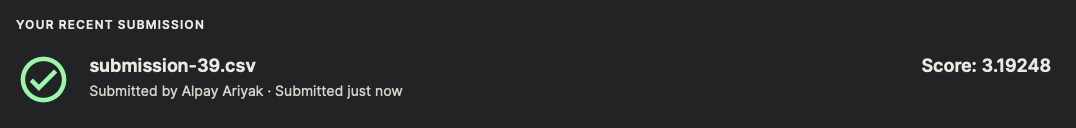
As we can see, the baseline method leaves us at a very high testing loss

Shallow model:
# **XGBoost**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(new_train, new_target, train_size=0.8, test_size=0.2, random_state=0)

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae

#default settings 
XGB_factory = XGBRegressor(random_state = 0)

XGB_factory.fit(X_train, y_train)

validp_XGBFactory = XGB_factory.predict(X_valid)

# Calculate RMSLE
mae_XGB_factory = mae(y_valid, validp_XGBFactory) # Your code here

# Uncomment to print MAE
print("MAE:" , mae_XGB_factory)

predictions_XGB_factory = XGB_factory.predict(new_test)

In [ ]:
#CSV
output = pd.DataFrame({'id': movie_id,
                       'revenue': predictions_XGB_factory})
output.to_csv('submission.csv', index=False)

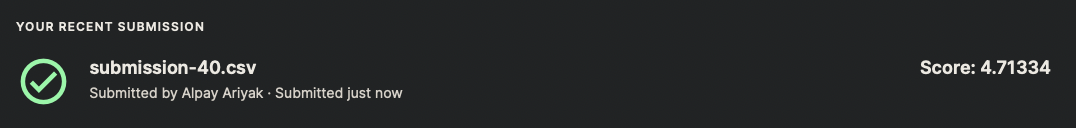
The rmsle went up. Upon closer inspection, I noticed that the model had generated negative predictions, which shouldn't be possible, so the most probable cause of this is not logifying the data. After this, I also decided to encode the data

In [ ]:
for nonlog in ['budget','popularity','runtime']:
    new_test[nonlog] = np.log(new_test[nonlog])
    
for nonlog in ['budget','popularity','runtime']:
    new_test[nonlog] = np.log(new_test[nonlog])

# Grid Search Optimized **XGBoost**

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(new_train, new_target, train_size=0.8, test_size=0.2, random_state=0)

from sklearn.model_selection import GridSearchCV
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.1, 0.05, 0.2],
              "n_estimators":[100, 300, 500 ]}


# model = XGBRegressor(n_estimators=100, n_jobs=-1, verbose = 0, silent = True)
# model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="neg_mean_squared_log_error", verbose = 0)
# model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="rmsle",eval_set=[(X_valid, y_valid)], verbose = 0, silent = True)

from sklearn.ensemble import RandomForestRegressor
decision3 = RandomForestRegressor(random_state=0, n_estimators = 900)
decision3.fit(X_train, y_train)
validpred = decision3.predict(X_valid)
print(rmsle(y_valid, validpred))

In [ ]:
from tensorflow import keras
from keras import layers

model_1 = keras.Sequential([
        layers.BatchNormalization(),
        layers.Dense(100, input_shape=[14]),
        layers.Dense(1, activation='relu')
    ])

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model_1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping]
)